In [ ]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt

---
#### CS 260 Final Project - SP23
---

# Examining Spotify Tracks and Data



### By: Evan Herrera, Alanna Hartzell, Patrick Kerrigan



---

## 1. Introduction

For this project, our group explored Spotify music streaming service data. Our research emcompassed many different qualities of songs including variables such as genre, popularity, energy, danceability, and more. This data set is very vast and diverse with regards to each track is unique. We found a data set that provided roughly 114,000 rows and 21 rows allowing us to have a great idea of how this data matches up with each other.

From this data set, we focused on asking these questions:
1. What are the top fifty most popular track genres in the dataset?
2. What are the top 10 most dancaeble tracks in the dataset?
3. How did the percent of listeners of pop, rock, lofi, and sad genres change over time?
4. Is there a correlation between the level of energy and danceability in songs?
5. Does the tempo of songs increase or decrease as energy levels rise?
6. How does energy vary in songs based on if they are clean or explicit?


---

## 2. Data

A direct link to the data can be found at the following website:
 * https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


**This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with it.**

According the website, the data is authentic and was scraped using both Python and Spotify Web API. It was made availible on October 22, 2022


In [ ]:
#In this cell, we load the data.
try:
    #loading csv data from github
    dataset1 = pd.read_csv("https://raw.githubusercontent.com/EvanHerr/Databases_Final_Project/main/Spotify_Dataset.csv")
    dataset2 = pd.read_csv("https://raw.githubusercontent.com/EvanHerr/Databases_Final_Project/main/Spotify_Second_Dataset")



    #Connecting code to database
    conn = sql.connect('Spotify.db')

    #Loadingthe csv data into a table
    dataset1.to_sql('Spotify', conn, index = False)
    dataset2.to_sql('Spotify2', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


In [ ]:
#In this cell we show all of the rows of the table.
sql_statement = """SELECT *
                   FROM Spotify"""

results = pd.read_sql_query(sql_statement, conn)
results

,row_id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### 2.1 Summary of Variables within the Spotify Table

The Spotify table has 21 columns/variables and 114001 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "Spotify Dataset" (
	"row_id"	INTEGER NOT NULL,
	"track_id"	TEXT NOT NULL,
	"artists"	TEXT,
	"album_name"	TEXT,
	"track_name"	TEXT,
	"popularity"	INTEGER,
	"duration_ms"	INTEGER,
	"explicit"	TEXT,
	"danceability"	REAL,
	"energy"	REAL,
	"key"	INTEGER,
	"loudness"	REAL,
	"mode"	INTEGER,
	"speechiness"	REAL,
	"acousticness"	REAL,
	"instrumentalness"	REAL,
	"liveness"	REAL,
	"valence"	REAL,
	"tempo"	REAL,
	"time_signature"	INTEGER,
	"track_genre"	TEXT,
	PRIMARY KEY("Number")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics:

*  **row_id** – Primary key distincting all the rows in table
    * Number of missing values: 0
    * Contains 114000 distinct values

*  **track_id** – This column consists of the id’s spotify gives to certain tracks, this can be considered a foreign key
    * Number of missing values: 0
    * Contains 114000 distinct values.

*  **artists** – This column lists the artists’ names who performed the track. If there is more than one it is separated by a ‘;’.
    * Number of missing values: 1
    * Contains many different distinct values that have the name of the creator of the song. Some include Pink Floyd, Taylor Swift, Rihanna, Beyonce, James Mraz.

* **album_name** - This column lists the album name the track appears within
    * Number of missing values: 1
    * Contains many different distinct values that are the names of the albums. Includes: Comedy, Ghost, To Begin Again, Is There Anybody Out There? etc.

* **track_name** - This column lists the name of the track.
    * Number of missing values: 1
    * Contains many distinct values that are the actual names of the song as displayed on Spotify. Includes values such as Im Yours, Hunger, Photograph, 93 Million Miles.

* **duration_ms** - This column gives the duration of a track in milliseconds
    
    * Number of missing values: 0
    * Units: milliseconds
    * Max value: 5237295
    * Min value: 0
    * Average value: 228029

* **danceability** – This column describes how suitable a track is for dancing based on a combination of musical elements. These elements include; tempo, rhythm, stability, beat strength, and overall regularity. A value of 0.0 is lease danceable and 1.0 is most danceable.

    * Number of missing values: 0
    * max value: 0.985
    * min value: 0.0
    * average value: 0.5668

* **popularity** - This column gives a popularity rating of the track on a scale from 1 - 100
    * Number of missing values: 0
    * max value: 100
    * min value: 0
    * average value: 33.23

* **energy** – This column is represents a measure of intensity and activity. Energetic tracks are fast, loud, and noisy. A value of 0.0 shows no energy and 1.0 is most energetic.

    * Number of missing values: 1
    * max value: 1.0
    * min value: 0.0
    * average value: 0.641383


* **speechiness** – This column represents the presence of spoken words within a track.

    * Number of missing values: 0
    * max value: 0.965
    * min value: 0.0
    * average value: 0.084652


* **acousticness** – This column is a value of how acoustic a track is. Where 1.0 means that the song is most likely acoustic.

    * Number of missing values: 0
    * max value: 0.996
    * min value: 0.0
    * average value: 0.31491


* **instrumentalness** – This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.

    * Number of missing values: 0
    * max value: 1.0
    * min value: 0.0
    * average value: 0.15605


* **liveness** – This refers to reverberation time.

    * Number of missing values: 0
    * max value: 1.0
    * min value: 0.0
    * average value: 0.213553

* **valence** – This describes the musical positiveness that is audible from the song.

    * Number of missing values: 0
    * max value: 0.995
    * min value: 0.0
    * average value: 0.474068
    
* **key** – This column represents the key a track is in using standard pitch class notation.

    * Number of missing values: 0
    * max value: 11
    * min value: 0
    * average value: 5.30914


* **loudness** – This column represents overall loudness of a track.

    * Number of missing values: 0
    * Units: decibels
    * max value: 4.532
    * min value: -49.531
    * average value: -8.25896


* **mode** – This column indicates the modality (major or minor) of a track major is represented by 1 and minor is represented by 0.
    * Number of missing values: 0
    * max value: 1
    * min value: 0
    * average value: .637553


* **tempo** – This column provides the overall estimated tempo of a track.
    * Number of missing values: 0
    * Units: Beats Per Minute
    * max value: 243.272
    * min value: 0.0
    * average value: 122.147837


* **time_signature** – This column provides an estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar
    * Number of missing values: 0
    * max value: 5
    * min value: 0
    * average value: 3.904035


* **track_genre** – This column represents the genre in which the track belongs to.
    * Number of missing values:0
    * Contains 114 distinct values


* **explicit** – This columns checks whether or not the track has explicit lyrics
    * Number of missing values: 0
    * max value: 1
    * min value: 0
    * average value: .0855


In this section we include the code used to describe the variables in the previous section.



In [ ]:
#Here we get the count of values in the each column.
sql_statement = """
                    SELECT COUNT(row_id), COUNT(track_id), COUNT(artists), COUNT(album_name), COUNT(track_name),
                           COUNT(popularity), COUNT(duration_ms), COUNT(explicit), COUNT(danceability), COUNT(energy),
                           COUNT(key), COUNT(loudness), COUNT(mode), COUNT(speechiness), COUNT(acousticness),
                           COUNT(instrumentalness), COUNT(liveness), COUNT(valence), COUNT(tempo), COUNT(time_signature),
                           COUNT(track_genre)
                    FROM Spotify;
                """

results = pd.read_sql_query(sql_statement, conn)
results

,COUNT(row_id),COUNT(track_id),COUNT(artists),COUNT(album_name),COUNT(track_name),COUNT(popularity),COUNT(duration_ms),COUNT(explicit),COUNT(danceability),COUNT(energy),...,COUNT(loudness),COUNT(mode),COUNT(speechiness),COUNT(acousticness),COUNT(instrumentalness),COUNT(liveness),COUNT(valence),COUNT(tempo),COUNT(time_signature),COUNT(track_genre)
0,114000,114000,113999,113999,113999,114000,114000,114000,114000,114000,...,114000,114000,114000,114000,114000,114000,114000,114000,114000,114000


In [ ]:
#Here we get the min, max, average, and number of missing values in each column.
sql_statement = """
                   SELECT MIN(row_id), MAX(row_id), AVG(row_id), MIN(track_id), MAX(track_id), AVG(track_id), MIN(artists), MAX(artists), AVG(artists), MIN(track_name), MAX(track_name), AVG(track_name),
                         MIN(popularity), MAX(popularity), AVG(popularity), MIN(duration_ms), MAX(duration_ms), AVG(duration_ms), MIN(explicit), MAX(explicit), AVG(explicit),MIN(danceability), MAX(danceability), AVG(danceability),
                         MIN(energy), MAX(energy), AVG(energy), MIN(key), MAX(key), AVG(key), MIN(loudness), MAX(loudness), AVG(loudness), MIN(mode), MAX(mode), AVG(mode), MIN(speechiness), MAX(speechiness), AVG(speechiness),
                         MIN(acousticness), MAX(acousticness), AVG(acousticness), MIN(instrumentalness), MAX(instrumentalness), AVG(instrumentalness), MIN(liveness), MAX(liveness), AVG(liveness),
                         MIN(valence), MAX(valence), AVG(valence), MIN(tempo), MAX(tempo), AVG(tempo), MIN(time_signature), MAX(time_signature), AVG(time_signature), MIN(track_genre), MAX(track_genre), AVG(track_genre)
                    FROM Spotify;

                """

results = pd.read_sql_query(sql_statement, conn)
results

,MIN(row_id),MAX(row_id),AVG(row_id),MIN(track_id),MAX(track_id),AVG(track_id),MIN(artists),MAX(artists),AVG(artists),MIN(track_name),...,AVG(valence),MIN(tempo),MAX(tempo),AVG(tempo),MIN(time_signature),MAX(time_signature),AVG(time_signature),MIN(track_genre),MAX(track_genre),AVG(track_genre)
0,0,113999,56999.5,0000vdREvCVMxbQTkS888c,7zz7iNGIWhmfFE7zlXkMma,inf,!nvite,龍藏Ryuzo,3.194607,!I'll Be Back!,...,0.474068,0.0,243.372,122.147837,0,5,3.904035,acoustic,world-music,0.0


---

## 3. Analysis


For our first question we will be looking into the most popular tracks in our dataset

### Q1:  What are the top fifty most popular on average track genres in the dataset?

In [ ]:
#Here we select the track genre and its average popularity
#We will be limiting the results to 50 genres because the dataset has a lot of different genres
sql_statement = """ SELECT track_genre, AVG(popularity) AS popularity
                    FROM spotify
                    GROUP BY track_genre
                    ORDER BY popularity DESC
                    LIMIT 50;"""

results = pd.read_sql_query(sql_statement, conn)
results


,track_genre,popularity
0,pop-film,59.283
1,k-pop,56.896
2,chill,53.651
3,sad,52.379
4,grunge,49.594
5,indian,49.539
6,anime,48.772
7,emo,48.128
8,sertanejo,47.866
9,pop,47.576


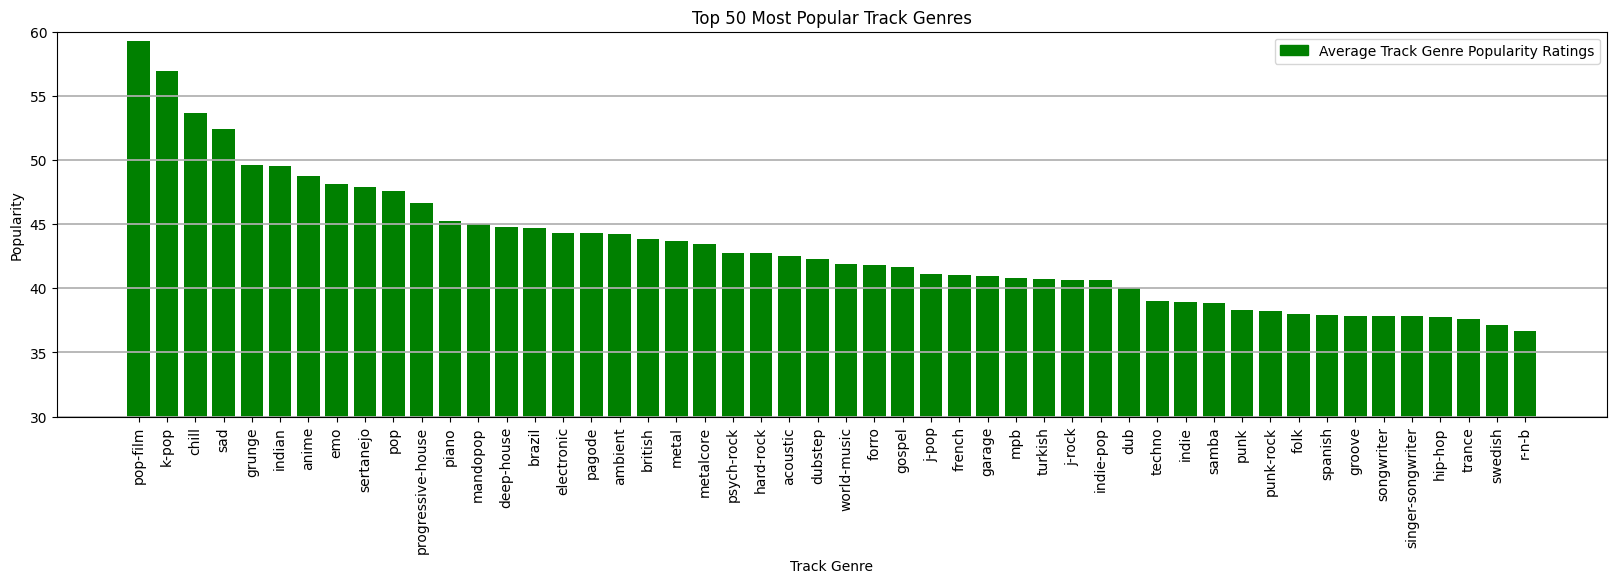

In [ ]:
#Here we are creating a bar plot to graph the 50 different genres in order from highest to lowest
plt.figure(figsize = (20,5))
plt.bar(results['track_genre'], results['popularity'], color = 'green')
plt.xlabel('Track Genre')
plt.ylabel('Popularity')
plt.ylim(30,60)
plt.title('Top 50 Most Popular Track Genres')
plt.xticks(rotation = 90)
plt.grid(linewidth = 1.25, axis = 'y')
colors = {'Average Track Genre Popularity Ratings': 'Green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

In this visualization above, we created a bar graph that tells us the top fifty track-genres based on average popularity. We feel that pop-film is the most popular because typically pop songs tend to have catchy rhythms to make them more appealing to audiences. Also, these songs have appeared in films before so this can also add to how they become so popular since more people are exposed to the music in theaters. We believe the K-Pop is so popular because this is a genre that is known to have a very strong fanbase. K-Pop also has catchy songs, is visually pleasing with regards to live performance and music videos, and it also has a very unique and distinct sound. Also, K-Pop is most popular in South Eastern Asian countries such as South Korea, Indonesia, Phillippines, and Japan. This region of the world has an extremely high population which can explain why there are so many people listen to K-Pop songs.

After seeing this visualization, we thought about how this could have changed over time. More specifically, we wanted to visualize the change in popularity over a range of time to see if these genres have always been popular or if there was a spike at some point. We felt that some genres probably were always popular but some got very popular more recently.

For our second question, we wanted to take a look at how popular genres have changed over time (years).

### Q2:  How did the percent of listeners of pop, rock, lofi, and sad genres change over time?



In [ ]:
#This code will be using a join statement to find the percentage of listeners who listen to pop music.
sql_statement = """SELECT s1.track_id, s2.year as year, 1.0* COUNT(s1.track_genre) / 100.0 * (SELECT COUNT(s1.track_genre)  FROM Spotify s3
                        JOIN
                          Spotify2 s4
                        ON s3.track_id = s4.id
                        WHERE s2.year = s4.year) as pop
                   FROM Spotify s1
                        JOIN
                          Spotify2 s2
                        ON s1.track_id = s2.id
                   WHERE s1.track_genre = 'pop' OR s1.track_genre = 'k-pop'
                                                OR s1.track_genre = 'pop-film'
                                                OR s1.track_genre = 'mandopop'
                                                OR s1.track_genre = 'j-pop'
                                                OR s1.track_genre = 'indie-pop'
                   GROUP BY s2.year; """

pop_statement = pd.read_sql_query(sql_statement, conn)
pop_statement

,track_id,year,pop
0,0UsdtLayy7SqJ4rUsDMRk8,1948,0.04
1,6S3JlDAGk3uu3NtZbPnuhS,1971,0.01
2,6qtSFL6qFbw7EmaRIsS0IR,1982,0.04
3,4Qnhgqm32HUt8rIOqURZ1w,1983,0.09
4,1naVD19eofGpFf6wosmHIe,1987,0.09
5,0dUbhFM18NyBDDpiktEQLk,1988,0.16
6,3xGwSN1dDdpN2s8oP8DRrC,1989,0.16
7,05NYcsjJwOYq4jIiKPVj9p,1990,0.01
8,31AOj9sFz2gM0O3hMARRBx,1991,0.16
9,4XglvuvmwdVQ1MpV3zNUnR,1992,0.25


In [ ]:
#This code will be using a join statement to find the percentage of listeners who listen to lofi music.
sql_statement = """SELECT s1.track_id, s2.year as year, 1.0* COUNT(s1.track_genre) / 100.0 * (SELECT COUNT(s1.track_genre)  FROM Spotify s3
                        JOIN
                          Spotify2 s4
                        ON s3.track_id = s4.id
                        WHERE s2.year = s4.year) as lofi
                   FROM Spotify s1
                        JOIN
                          Spotify2 s2
                        ON s1.track_id = s2.id
                   WHERE s1.track_genre = 'chill' OR s1.track_genre = 'anime' OR s1.track_genre = 'electronic'
                   GROUP BY s2.year;
                   """

lofi_statement = pd.read_sql_query(sql_statement, conn)
lofi_statement

,track_id,year,lofi
0,2ZJ28Rm7OXMYJshLtp5uff,1989,0.01
1,7o2AeQZzfCERsRmOM86EcB,1992,0.01
2,3Ty7OTBNSigGEpeW2PqcsC,1994,0.16
3,21Phj46KeUHOWyZW9A9b7P,1995,0.01
4,67Hna13dNDkZvBpTXRIaOJ,1998,0.04
5,39HrUxcvKF3jtLz7fUDWXc,1999,0.04
6,5drK2kTE2mrUdV33iHWyrx,2000,0.04
7,3gFQOMoUwlR6aUZj81gCzu,2001,0.36
8,3IEG65Fi7Zm8cQEEG3uJ4H,2002,0.01
9,6IZF8hi9J6EtFDLQqOlSbu,2004,0.36


In [ ]:
#This code will be using a join statement to find the percentage of listeners who listen to sad music.
sql_statement = """SELECT s1.track_id, s2.year as year, 1.0* COUNT(s1.track_genre) / 100.0 * (SELECT COUNT(s1.track_genre)  FROM Spotify s3
                        JOIN
                          Spotify2 s4
                        ON s3.track_id = s4.id
                        WHERE s2.year = s4.year) as sad
                   FROM Spotify s1
                        JOIN
                          Spotify2 s2
                        ON s1.track_id = s2.id
                   WHERE s1.track_genre = 'emo'
                   GROUP BY s2.year;

                """

sad_genres = pd.read_sql_query(sql_statement, conn)
sad_genres

,track_id,year,sad
0,51R5mPcJjOnfv9lKY1u5sW,1999,0.01
1,5lKoQE1qdSfbvbkldmMM3A,2000,0.01
2,6GG73Jik4jUlQCkKg9JuGO,2001,0.04
3,16Fp67kTFhH0XK5Cl6Oz7r,2002,0.01
4,7lRlq939cDG4SzWOF4VAnd,2004,0.36
5,2TfSHkHiFO4gRztVIkggkE,2005,0.04
6,7j31rVgGX9Q2blT92VBEA0,2006,1.96
7,3Zwu2K0Qa5sT6teCCHPShP,2007,0.04
8,7JIuqL4ZqkpfGKQhYlrirs,2009,0.64
9,0YAMQSmHk6BSUGTYpaoqTJ,2010,0.04


In [ ]:
#This code will be using a join statement to find the percentage of listeners who listen to rock music.
sql_statement = """SELECT s1.track_id, s2.year as year, 1.0* COUNT(s1.track_genre) / 100.0 * (SELECT COUNT(s1.track_genre)  FROM Spotify s3
                        JOIN
                          Spotify2 s4
                        ON s3.track_id = s4.id
                        WHERE s2.year = s4.year) as rock
                   FROM Spotify s1
                        JOIN
                          Spotify2 s2
                        ON s1.track_id = s2.id
                   WHERE s1.track_genre = 'grunge' OR s1.track_genre = 'metalcore'
                                                   OR s1.track_genre = 'psych-rock'
                                                   OR s1.track_genre = 'hard-rock'
                   GROUP BY s2.year;


                   """

rock_genres = pd.read_sql_query(sql_statement, conn)
rock_genres

,track_id,year,rock
0,5ZBeML7Lf3FMEVviTyvi8l,1963,1.69
1,65vdMBskhx3akkG9vQlSH1,1964,1.21
2,3BQHpFgAp4l80e1XslIjNI,1965,5.76
3,1qRA5BS78u3gME0loMl9AA,1966,7.84
4,1Eolhana7nKHYpcYpdVcT5,1967,47.61
5,2aoo2jlRnM3A0NyLQqMN2f,1968,8.41
6,0hCB0YR03f6AmQaHbwWDe8,1969,16.00
7,78lgmZwycJ3nzsdgmPPGNx,1970,27.04
8,5CQ30WqJwcep0pYcV4AMNc,1971,14.44
9,7Ar4G7Ci11gpt6sfH9Cgz5,1972,2.89


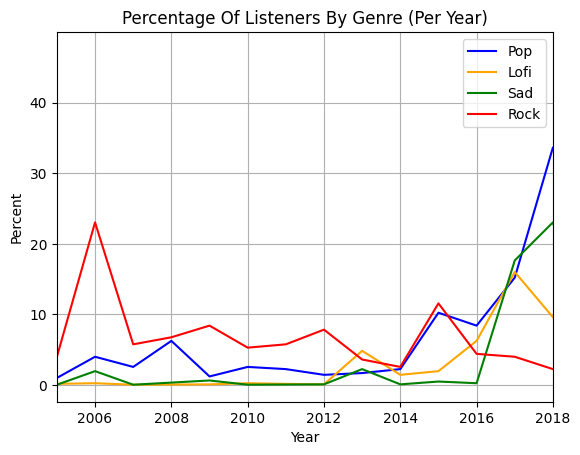

In [ ]:
#Here we are creating a line plot to graph the different percentage of listeners over time per genre
plt.plot(pop_statement["year"], pop_statement["pop"], color = "blue")
plt.plot(lofi_statement["year"], lofi_statement["lofi"], color = "orange")
plt.plot(sad_genres["year"], sad_genres["sad"], color = "green")
plt.plot(rock_genres["year"], rock_genres["rock"], color = "red")


colors = {"Pop" : "Blue", "Lofi" : "Orange", "Sad": "Green", "Rock": "Red" }
labels = list(colors.keys())
plt.xlim(2005, 2018)
plt.title("Percentage Of Listeners By Genre (Per Year)")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.grid(linewidth = .8)
plt.legend(labels);

Looking at the linegraph from above we see that rock is orginally the best genre compared to the other three but we see as the years go on lofi, sad, and pop music rise. We were a little concerened about the pop genre in the beggining thinking that pop would be steady throughout the line graph but we realized that pop in the dataset is considerring modern day pop so songs that may have been considered pop in the 2000s or early 2010s may not be considerred pop in the dataset. We also see rock slowly die down but still remain a popular genre as we also see sad, lofi and pop genres rise after about 2015.

From this visualization and after seeing how favorite genres have shifted over time, we were interesting in seeing what songs are most danceable and begin comparing songs to different qualities they may have.

### Q3:  What are the top 10 most danceable tracks in the dataset?

In [ ]:
#This is a code cell to narrow down the tracks with the most danceability
sql_statement = """ SELECT track_name, MAX(danceability) AS danceability, artists, track_genre
                    FROM spotify
                    GROUP BY artists
                    ORDER BY danceability DESC
                    LIMIT 10;"""

popresults = pd.read_sql_query(sql_statement, conn)
popresults

,track_name,danceability,artists,track_genre
0,Sol Clap,0.985,Quantic,trip-hop
1,Medicaid Baby,0.984,That Girl Lay Lay,kids
2,Inspiration,0.983,Delano Smith,detroit-techno
3,Daily Routines,0.982,Oliver Schories,minimal-techno
4,Bitches,0.981,dj funk,chicago-house
5,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",0.981,Mixx Master Lee,kids
6,Plastik Fantastik,0.980,Felix Da Housecat,chicago-house
7,Dancing in My Room,0.980,347aidan,sad
8,The Underground - Hatiras Remix,0.979,DJ Pierre;My Digital Enemy;Hatiras,chicago-house
9,The Soccer Song (Football Song),0.979,CoComelon,children


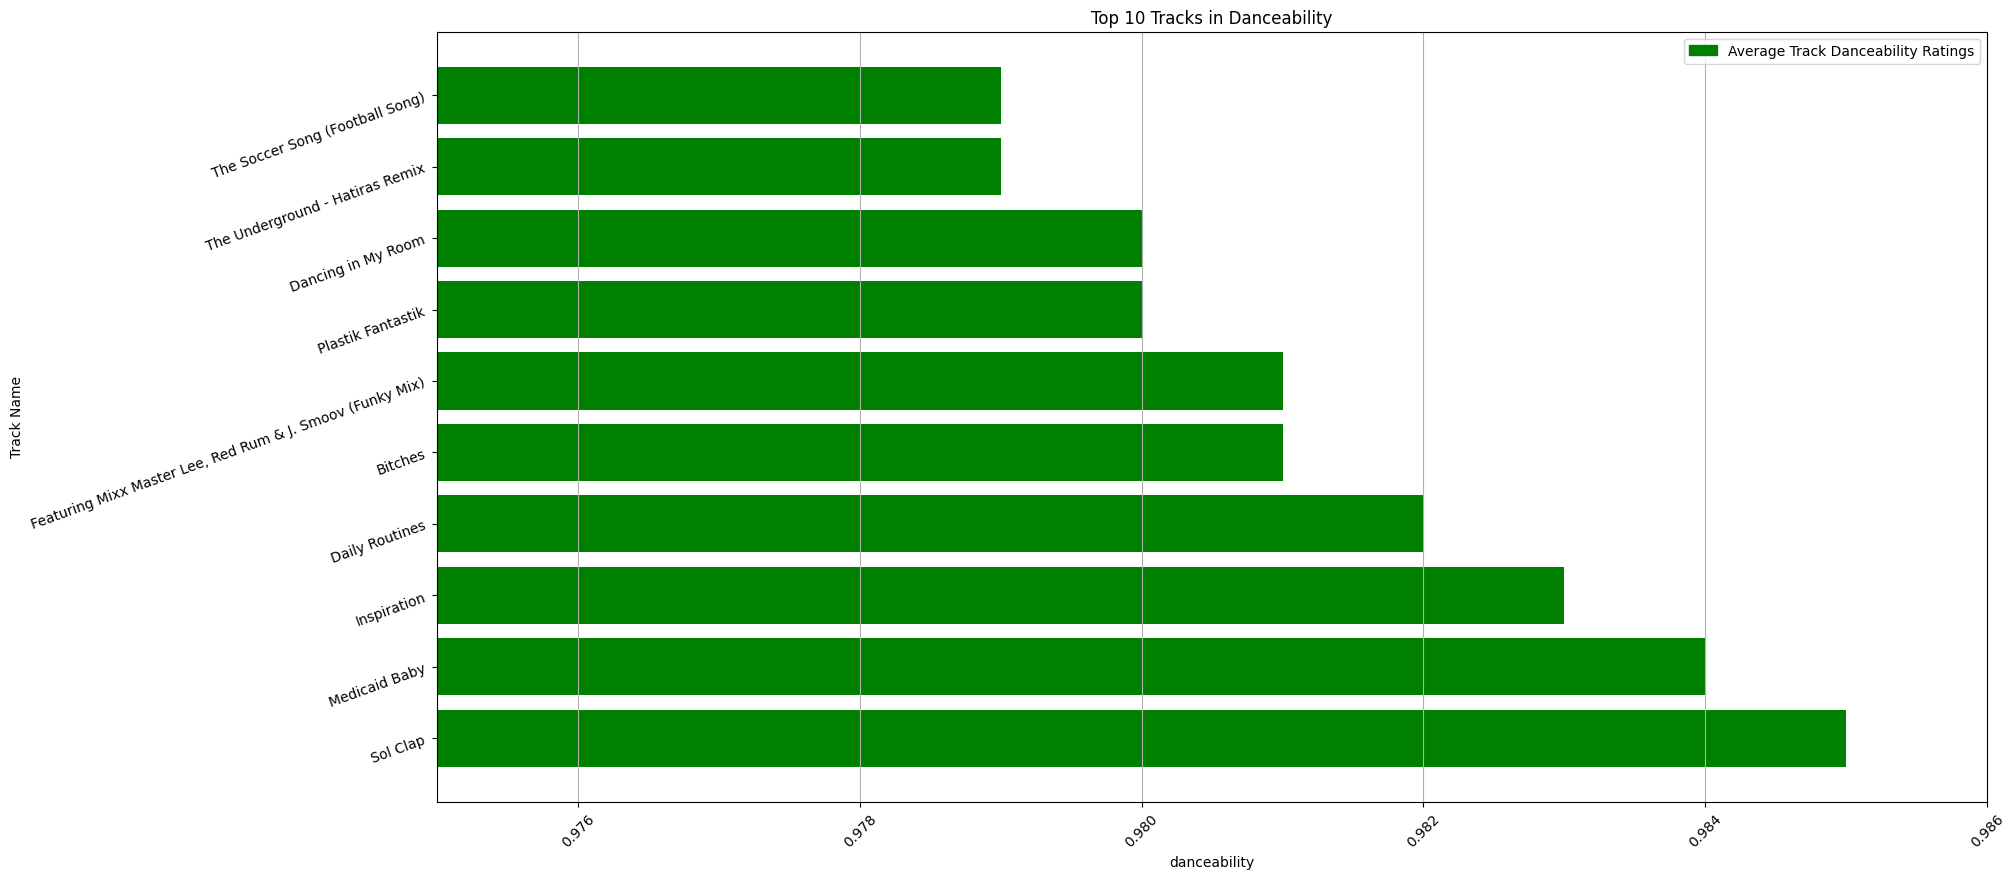

In [ ]:
plt.figure(figsize = (20,10))
plt.barh(popresults['track_name'], popresults['danceability'], color = 'green')
plt.xlabel('danceability')
plt.ylabel('Track Name')
plt.xlim(0.975,0.986)
plt.title('Top 10 Tracks in Danceability')
plt.xticks(rotation = 45)
plt.yticks(rotation = 20)
plt.grid(axis = 'x')
colors = {'Average Track Danceability Ratings': 'Green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

In this visualization, we created a bar graph to see which ten tracks were the most danceable. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. One thing we found interesting is that most of the genres for these tracks are some form of electronic music such as techno or house music. While we were not able to visualize the genres, we made sure we were able to see them in our coding section. We feel that the reason these tracks are more danceable is because they have high energy and liveness.


After looking at this we wanted to see if there is a correlation with songs that have high danceability and energy. We felt like creating a histogram the best way to go about answering this thought.

For our fourth question, we wanted to analyze levels of energy and danceability in songs.

### Q4:  Is there a correlation between the level of energy and danceability in songs?

In [ ]:
# In this code cell we select all rows from the energy and danceability columns.
sql_statement = """
                SELECT energy, danceability
                FROM Spotify;
                """

results = pd.read_sql_query(sql_statement, conn)
results

,energy,danceability
0,0.4610,0.676
1,0.1660,0.420
2,0.3590,0.438
3,0.0596,0.266
4,0.4430,0.618
...,...,...
113995,0.2350,0.172
113996,0.1170,0.174
113997,0.3290,0.629
113998,0.5060,0.587


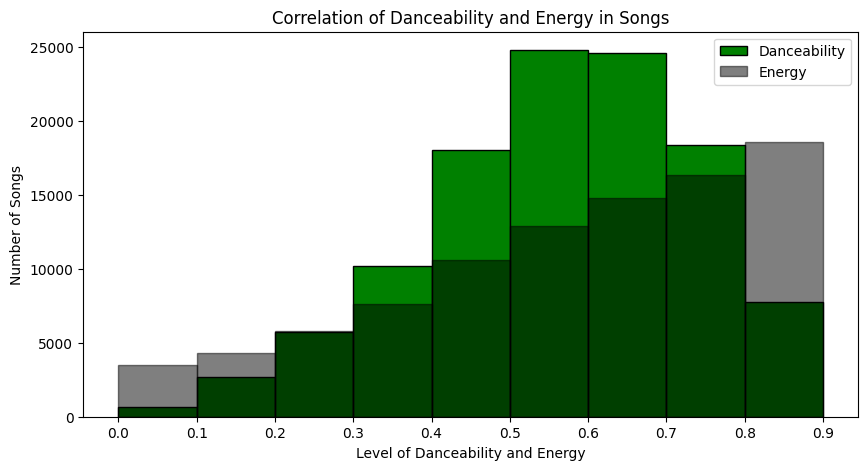

In [ ]:
# In this code cell, we build a histogram of the levels of danceability and energy for each song.
plt.figure(figsize =(10,5))
plt.hist(results['danceability'],edgecolor = 'black', color = 'green', bins = np.arange(0, 1, .10), label = 'Danceability')
plt.hist(results['energy'],edgecolor = 'black', color = 'black', bins = np.arange(0, 1, .10), alpha = 0.5, label = 'Energy')
plt.title ('Correlation of Danceability and Energy in Songs')
plt.xlabel ('Level of Danceability and Energy')
plt.ylabel ('Number of Songs')
plt.xticks (np.arange(0, 1, .10))
plt.legend ();

In this visualization we can see the level of danceability of a song plotted against the level of energy of a song. We see that the spreads of the two variables have some correlation. As the energy in songs increases, the danceabilty tends to also increase. However, for songs with the highest level of energy, the danceability drops lower. This does not follow the trend of the data prior. This may be because music with too high energy is difficult for listeners to dance to. The tempo of the high energy songs could be too fast to enjoy dancing to it.

Now we know that there is a relationship between the level of danceability and level of energy in songs. However, the drop in danceabilty for the most energetic songs makes us wonder if the tempo of energetic songs is also high.

For our fifth question, we wanted to look at the affect the tempo has on energy levels in songs.

### Q5:  Does the tempo of songs increase or decrease as energy levels rise?

In [ ]:
# In this code cell, we select the track_genre column, take the average tempo and average energy per genre.
sql_statement = """
                SELECT track_genre, AVG(tempo) AS avg_tempo, AVG(energy) AS avg_energy
                FROM Spotify
                GROUP BY track_genre;
                """

results = pd.read_sql_query(sql_statement, conn)
results

,track_genre,avg_tempo,avg_energy
0,acoustic,119.010624,0.435368
1,afrobeat,119.213337,0.702812
2,alt-rock,124.634404,0.754173
3,alternative,122.232394,0.720030
4,ambient,111.113129,0.237162
...,...,...,...
109,techno,128.255482,0.746413
110,trance,133.276726,0.845272
111,trip-hop,118.743616,0.622363
112,turkish,120.367607,0.609804


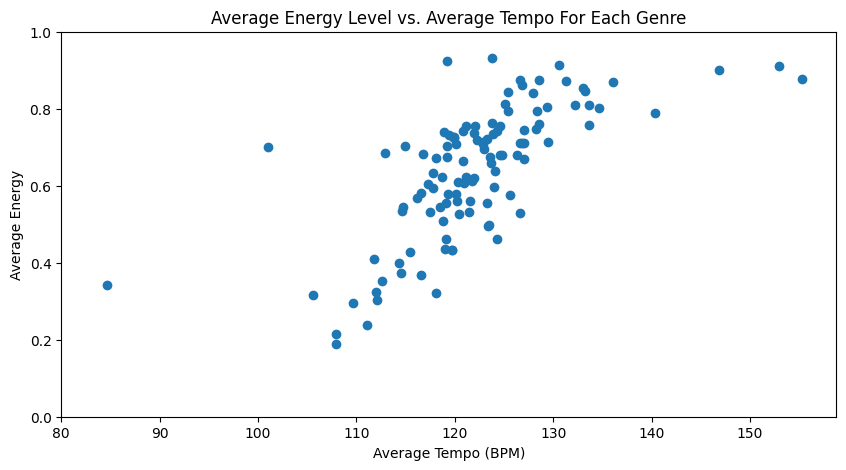

In [ ]:
# In this code cell, we create a scatter plot of the average energy level compared to the average tempo of each song genre in the database.
plt.figure(figsize =(10,5))
plt.scatter(results['avg_tempo'],results ['avg_energy'])
plt.xticks(np.arange(80, 160, 10))
plt.title("Average Energy Level vs. Average Tempo For Each Genre")
plt.xlabel('Average Tempo (BPM)')
plt.ylabel('Average Energy')
plt.ylim(0, 1);

In the visualization shown above, a scatter plot was created to show the average tempo for each music genre at average energy levels of these genres. Each plot points represent each of the genres in the dataset. From the graph, we can see that there is a positive association between average tempo and average energy. As the tempo of a song increases, the energy also tends to increase with it. It is understandable that the tempo influences energy.

In [ ]:
#This code cell will be finding that correlation coefficient between avgerage tempo and average energy.
r = np.corrcoef(results['avg_tempo'], results['avg_energy'])
r

array([[1.        , 0.69046041],
       [0.69046041, 1.        ]])

The correlation coefficient of the average tempo and average energy of songs has a moderate positive relationship. This can be seen in the visualization by the upward sloping points. There is moderately strong correlation between the two variables.

We are curious if explicit language influences the energy levels a song has.



For our sixth question, we want to analyze the energy of songs that are explicit vs clean.

### Q6:  How does energy vary in songs based on if they are clean or explicit?

In [ ]:
#In this code cell, we select the energy level of a song which doesn't use explicit words
#We had to limit the result to match the other code cell so the graph would have the same number of results for the comparison
sql_statement = """SELECT energy as e1
                   FROM spotify
                   WHERE explicit = 0
                   LIMIT 9747;
                   """

no_explicit_types = pd.read_sql_query(sql_statement, conn)
no_explicit_types

,e1
0,0.4610
1,0.1660
2,0.3590
3,0.0596
4,0.4430
...,...
9742,0.7690
9743,0.8780
9744,0.9520
9745,0.6980


In [ ]:
#In this code cell, we select the energy level of a song which use explicit words
sql_statement = """SELECT energy as e2
                   FROM spotify
                   WHERE explicit = 1;
                   """

explicit_types = pd.read_sql_query(sql_statement, conn)
explicit_types

,e2
0,0.5070
1,0.6740
2,0.9170
3,0.0423
4,0.8390
...,...
9742,0.4120
9743,0.8060
9744,0.6860
9745,0.8850


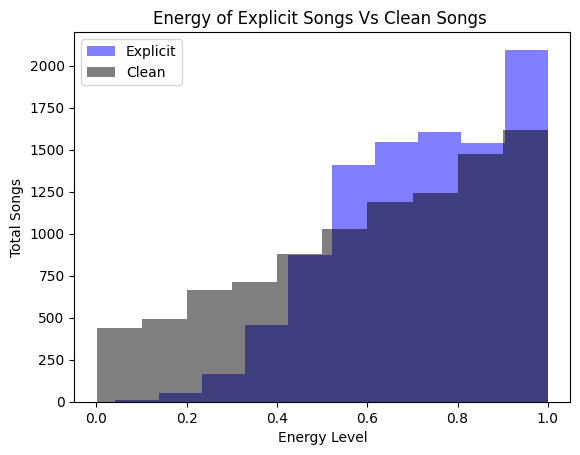

In [ ]:
#Here we are creating a histogram that will show the comparison between the types of songs that use explicit language and those who don't
plt.hist(explicit_types["e2"], color = "blue" , alpha = 0.5)
plt.hist(no_explicit_types["e1"], color = "black", alpha = 0.5);
plt.xlabel("Energy Level")
plt.ylabel("Total Songs")
plt.title("Energy of Explicit Songs Vs Clean Songs ")

colors = {"Explicit" : "Blue", "Clean" : "black" }
labels = list(colors.keys())
plt.legend(labels);

Looking at the visualization above we see that when energy level is low that there is a higher chances that the song isn't explicit while we see that as energy levels rise more songs use explicit langauge.

---

## Conclusion

From the data that we analyzed, we gathered a lot of information about Spotify tracks that varied from top tracks by genre and year to the energy and danceability of songs. We were able to see which track genres were the most popular on Spotify, with pop-film and k-pop being the highest. In addition, we found which tracks were top 10 in danceability.
We found that popular genres today weren't as popular 10-15 years ago so there may be a time in the future where current popular genres get overtaken by different types of music.
We found that the songs that are easiest to dance to don't have the highest energy levels. The songs that are easiest to dance to have energy levels that are a little above .6 energy.
Finally we found that energy has a strong correlation with tempo as well as that songs which use explicit language have a higher chance to have more energy that a song who doesn't use explicit language









